In [13]:
import pandas as pd
from torchvision.datasets import EuroSAT
from torchvision.transforms import v2
from src.EuroSat_dataloaders import Train_Dataset_EuroSat,Test_Dataset_EuroSat
import torch
from src.EuroSat_dataloaders import transformation_eurosat

transforms = v2.Compose([
    v2.ToTensor(),
    v2.ToDtype(torch.float32),
    v2.Resize(224),
])
ds = EuroSAT("../EuroSat",transform=transforms,target_transform=transformation_eurosat,download=False)

c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [14]:
ds_test = Test_Dataset_EuroSat(ds)
true_val = []
for i in range(len(ds_test)):
    true_val.append(ds_test[i][1].argmax().item())


c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


# Grad Cam

## ResNet50

#### Noise combined scale 0.5

In [15]:
import pandas as pd

df = pd.read_csv("finished\ResNet50_new\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,1.025495,0.014888,5.951896e-11,0.910814,0.929435
1,0.197505,-0.009667,1.051684e-04,0.581134,-0.120357
2,1.212512,0.136604,1.280991e-10,0.904795,0.911458
3,-0.616348,-0.328657,2.977074e-13,0.233239,-0.344545
4,0.087711,-0.153914,1.364771e-09,0.518455,-0.152712


In [16]:
df.max()

NSS    1.852026
IG     0.504177
MSE    1.999135
SIM    0.993503
CC     0.999538
dtype: float64

In [17]:
df.mean()

NSS    0.827771
IG     0.120006
MSE    0.065101
SIM    0.857331
CC     0.671382
dtype: float64

<AxesSubplot: >

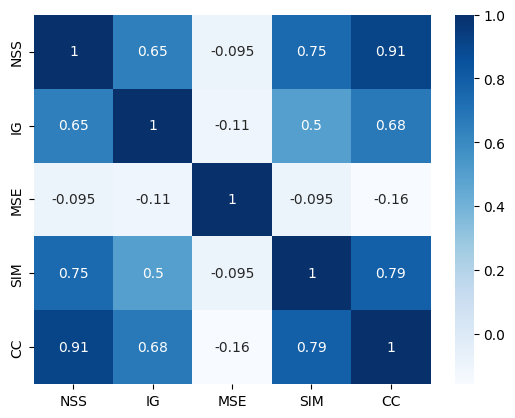

In [18]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

## VGG-16

#### Noise combined scale 0.5

In [19]:
import pandas as pd

df = pd.read_csv("finished\VGG16\\faithfulness_metrics_grad_cam_combained_noise_0_5.csv")
df.head()

,NSS,IG,MSE,SIM,CC
0,0.933809,0.281447,8.537472e-19,0.732940,0.582237
1,0.519270,0.309129,9.324441e-18,0.243224,0.400210
2,1.366455,0.403945,1.722154e-04,0.920560,0.840187
3,0.000000,0.000000,NaN,1.000000,0.000000
4,0.000000,0.000000,NaN,1.000000,0.000000


In [20]:
df.mean()

NSS    0.354408
IG     0.103833
MSE    0.281435
SIM    0.794425
CC     0.235166
dtype: float64

<AxesSubplot: >

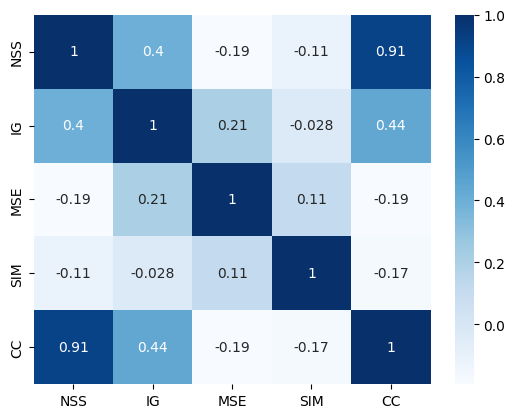

In [21]:
import seaborn as sb
corr = df.corr()
sb.heatmap(corr, cmap="Blues", annot=True)

# Grad Cam ++